# Titanic Disaster Prediction

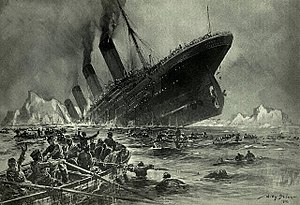

In [6]:
from IPython.display import Image
Image("titanic.jpg")

# Collect The Data

In [7]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Exploratory Data Analysis

In [44]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape

(891, 12)

In [12]:
test.shape

(418, 11)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Import Visualization Libraries

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #Setting seaborn default for plots

In [48]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

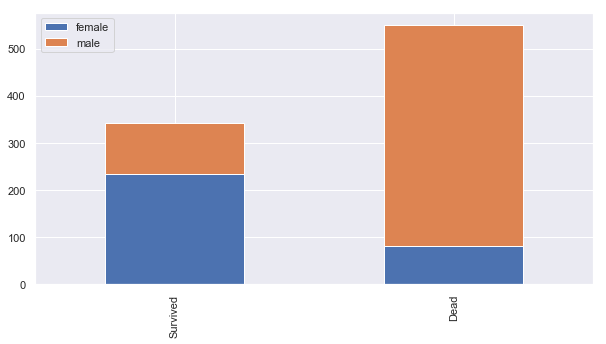

In [50]:
bar_chart('Sex')

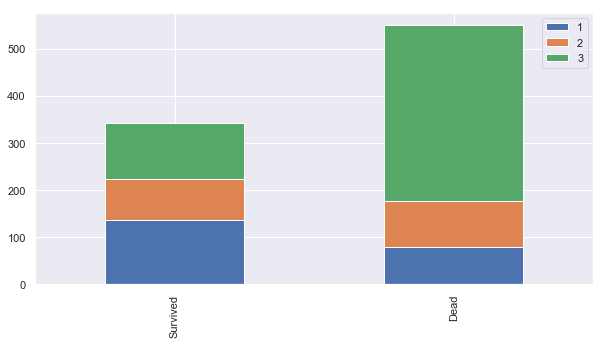

In [49]:
bar_chart('Pclass')

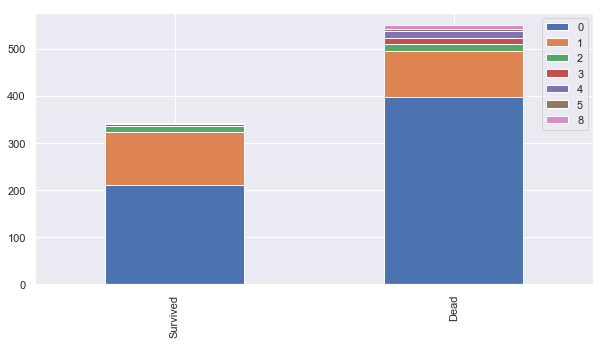

In [51]:
bar_chart('SibSp')

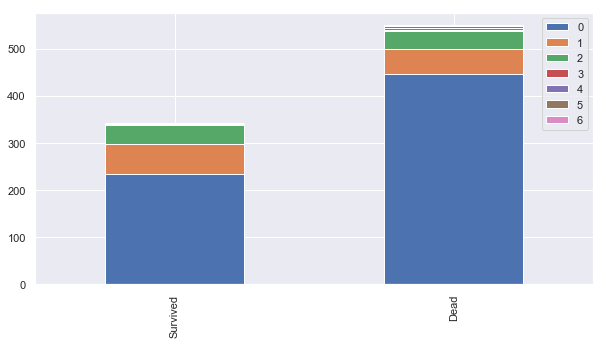

In [52]:
bar_chart('Parch')

In [53]:
train_test_data = [train, test] #combining train and test data

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [55]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Countess      1
Capt          1
Ms            1
Mme           1
Don           1
Lady          1
Jonkheer      1
Name: Title, dtype: int64

In [56]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mile": 3, 
                 "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3 }
for dataset in train_test_data:
    dataset["Title"] = dataset['Title'].map(title_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


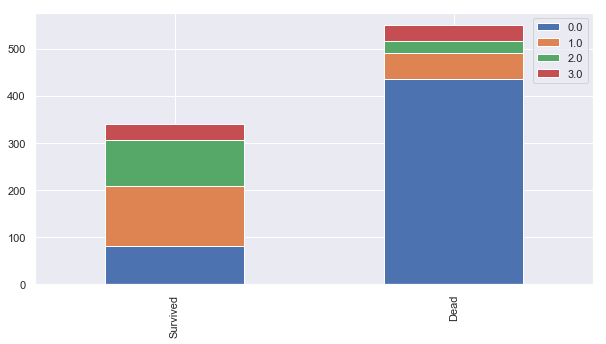

In [59]:
bar_chart('Title')

In [60]:
#Delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace = True)
test.drop('Name', axis=1, inplace = True)

In [66]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['sex'] = dataset['Sex'].map(sex_mapping)

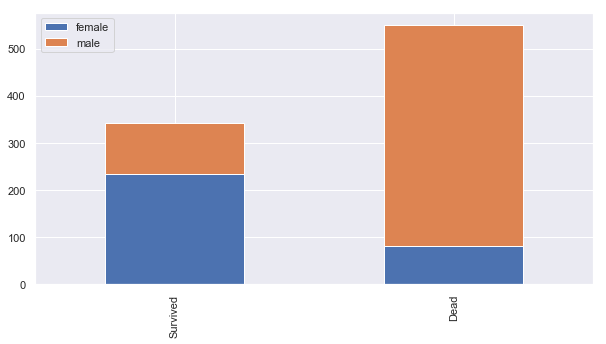

In [67]:
bar_chart('Sex')

In [68]:
#fill missing Age with median age for each title [Mr, Mrs, Miss & Other]
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


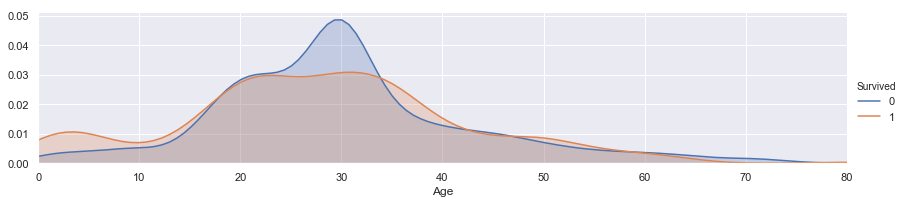

In [71]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

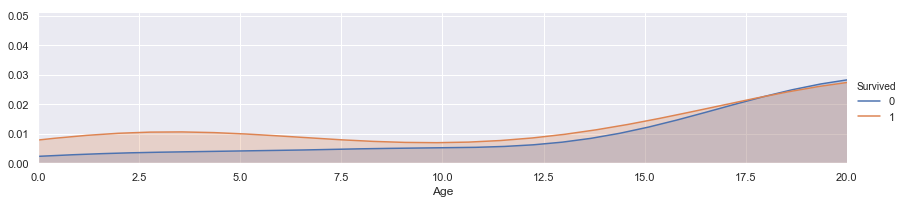

In [72]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          889 non-null float64
sex            891 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [74]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,sex
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2.0,1
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2.0,1
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0.0,0


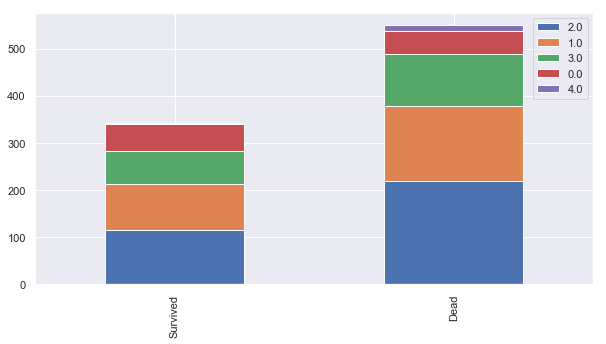

In [76]:
bar_chart('Age')

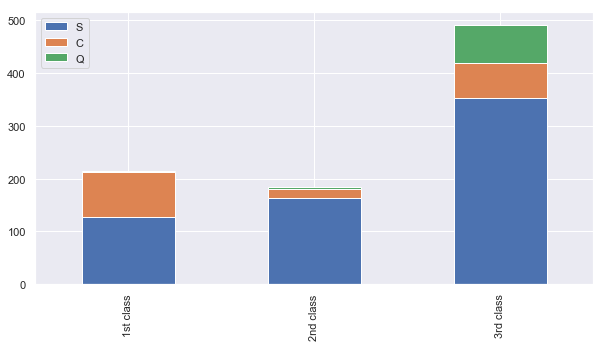

In [77]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [78]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [79]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [80]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,sex
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2.0,1
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2.0,1
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0.0,0
5,6,0,3,male,2.0,0,0,330877,8.4583,NaN,2,0.0,0
6,7,0,1,male,3.0,0,0,17463,51.8625,E46,0,0.0,0
7,8,0,3,male,0.0,3,1,349909,21.0750,NaN,0,3.0,0
8,9,1,3,female,2.0,0,2,347742,11.1333,NaN,0,2.0,1
9,10,1,2,female,0.0,1,0,237736,30.0708,NaN,1,2.0,1


In [81]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [82]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
F33                3
C22 C26            3
D                  3
E101               3
F4                 2
D17                2
C92                2
B20                2
E24                2
B51 B53 B55        2
B77                2
E25                2
C93                2
D26                2
E44                2
C2                 2
C52                2
B58 B60            2
D20                2
D33                2
C65                2
B35                2
B57 B59 B63 B66    2
E33                2
B22                2
C68                2
                  ..
E58                1
A10                1
D45                1
D30                1
A16                1
D49                1
D11                1
C104               1
C54                1
B50                1
D19                1
B37                1
A5                 1
A31                1
C32                1
B79                1
A6           

In [83]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

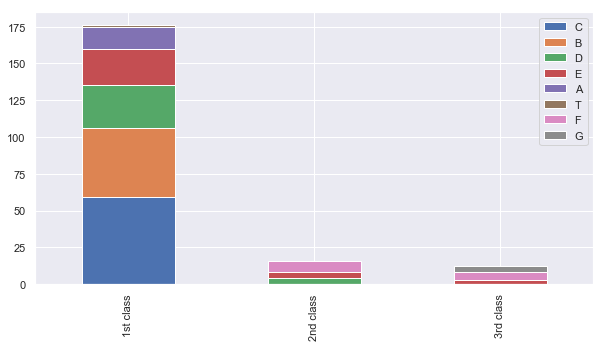

In [84]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [85]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [86]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [87]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

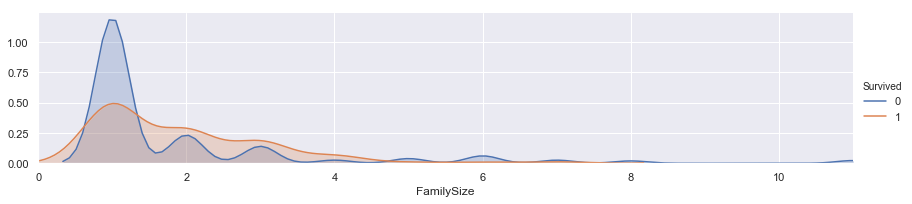

In [88]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [89]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [90]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [91]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

# Modelling

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         889 non-null float64
sex           891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 69.7+ KB


In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [103]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'male'